In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
def get_data(file_path: str) -> tuple[np.ndarray, np.ndarray]:
    with open(file_path, "r") as f:
        lines = f.readlines()
    x = []
    y = []
    for line in lines:
        x.append(float(line.split()[0]))
        y.append(float(line.split()[1]))
    return (np.array(x), np.array(y))


def prepare_data(
    x_data: np.ndarray, y_data: np.ndarray, test_size: float = 0.2
) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    x_data = x_data.reshape(-1, 1)
    y_data = y_data.reshape(-1, 1)
    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()
    x_data = x_scaler.fit_transform(x_data)
    y_data = y_scaler.fit_transform(y_data)
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, y_data, test_size=test_size
    )
    return (x_train, x_test, y_train, y_test)

In [46]:
def plot_data_model(
    data_file: str,
    hidden_units1: int,
    hidden_units2: int,
    epochs: int,
    activation: str = "relu",
) -> None:

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(1,)))
    model.add(
        tf.keras.layers.Dense(
            units=hidden_units1,
            activation=activation,
        )
    )
    model.add(
        tf.keras.layers.Dense(
            units=hidden_units2,
            activation=activation,
        )
    )
    model.add(tf.keras.layers.Dense(1))

    model.summary()
    model.compile(
        optimizer="adam",
        loss="mean_squared_error",
        metrics=[tf.keras.metrics.MeanSquaredError()],
    )

    x_data, y_data = get_data(data_file)

    x_train, x_test, y_train, y_test = prepare_data(x_data, y_data)

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor="loss", patience=300, mode="auto"
    )
    model.fit(
        x_train,
        y_train,
        epochs=epochs,
        verbose=0,
        callbacks=[early_stopping],
        # validation_data=(x_test, y_test),
        use_multiprocessing=True,
    )

    history = model.history
    y_pred = model.predict(x_test)

    _, test_accuracy = model.evaluate(x_test, y_test)
    _, train_accuracy = model.evaluate(x_train, y_train)

    metric_test = tf.keras.metrics.R2Score()
    metric_test.update_state(y_test, y_pred)

    metric_train = tf.keras.metrics.R2Score()
    metric_train.update_state(y_train, model.predict(x_train))

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(x_train, y_train, color="blue", marker="o")
    plt.scatter(x_test, y_test, color="green", marker="x")
    plt.scatter(x_test, y_pred, color="red", marker="^")
    plt.scatter(x_train, model.predict(x_train), color="orange", marker="v")
    plt.title(
        f"Neural Network\nTrain accuracy: {metric_test.result():.3f}, Test accuracy: {metric_train.result():.3f}"
    )

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"])
    plt.title(f"Final model loss: {history.history['loss'][-1]:.3f}")

    plt.legend(["train", "test", "pred"])

#### Dataset 4

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 100)               200       
                                                                 
 dense_124 (Dense)           (None, 300)               30300     
                                                                 
 dense_125 (Dense)           (None, 1)                 301       
                                                                 
Total params: 30801 (120.32 KB)
Trainable params: 30801 (120.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2/2 [==============================] - 0s 1ms/step


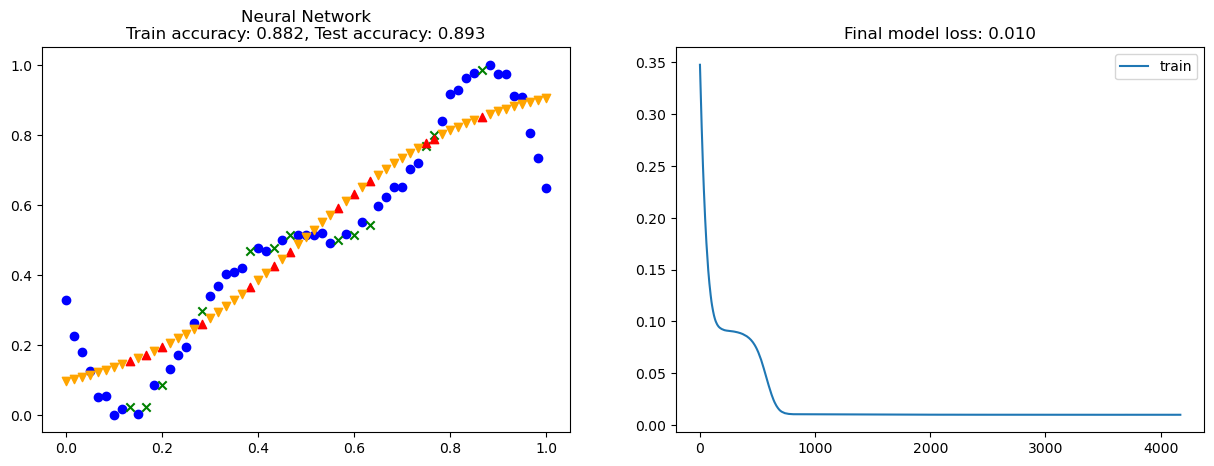

In [66]:
plot_data_model("data/dane4.txt", 100, 20, epochs=40_000, activation=tf.keras.activations.softmax)

#### Dataset 7

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 1200)              2400      
                                                                 
 dense_70 (Dense)            (None, 700)               840700    
                                                                 
 dense_71 (Dense)            (None, 1)                 701       
                                                                 
Total params: 843801 (3.22 MB)
Trainable params: 843801 (3.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2/2 [==============================] - 0s 3ms/step


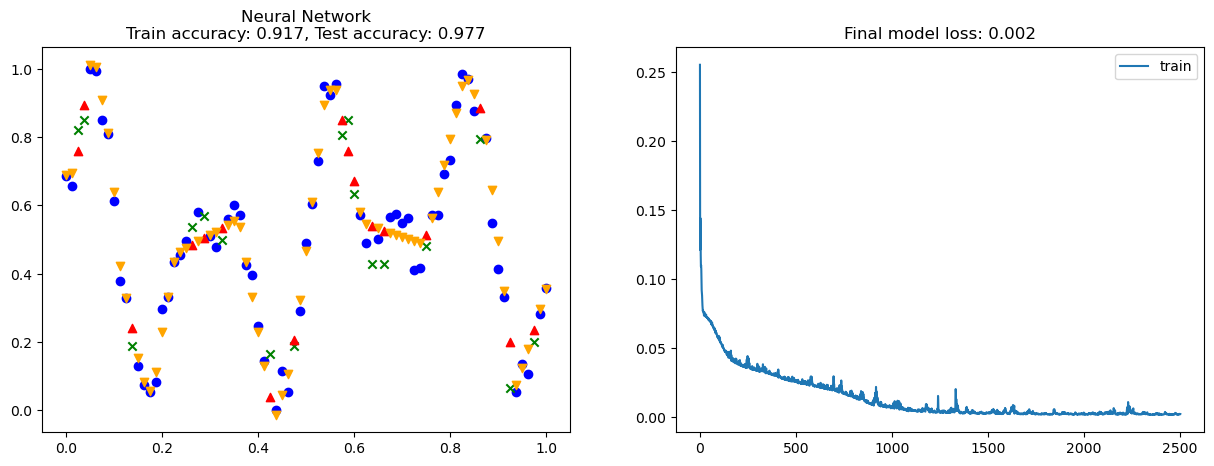

In [48]:
plot_data_model("data/dane7.txt", 1_200, 700, epochs=40_000, activation="relu")

#### Dataset 9

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_126 (Dense)           (None, 50)                100       
                                                                 
 dense_127 (Dense)           (None, 50)                2550      
                                                                 
 dense_128 (Dense)           (None, 1)                 51        
                                                                 
Total params: 2701 (10.55 KB)
Trainable params: 2701 (10.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
2/2 [==============================] - 0s 1ms/step


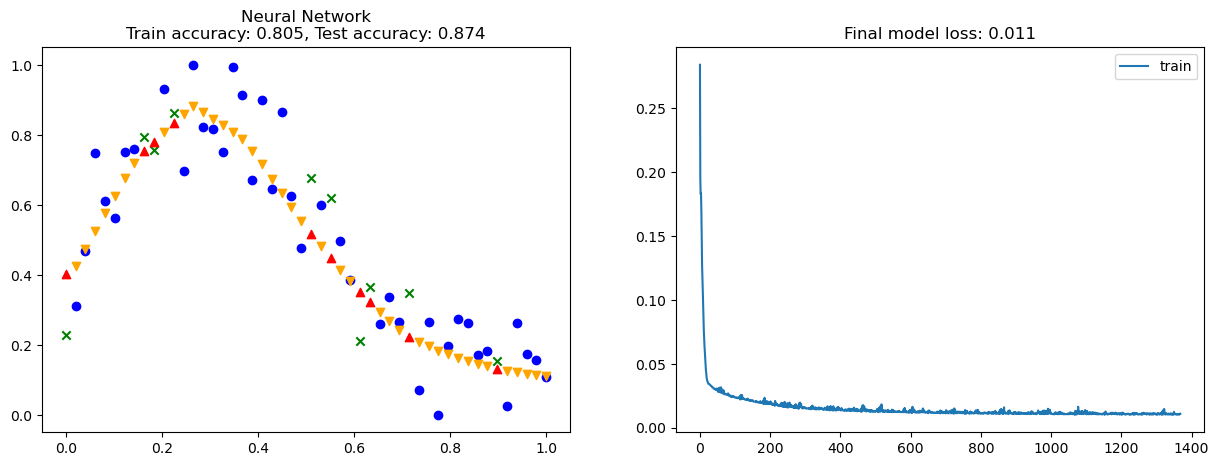

In [67]:
plot_data_model("data/dane9.txt", 50, 50, epochs=40_000, activation=tf.keras.activations.selu)
